In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Police_racial_equity/fatal_encounters_dot_org.csv')

# Copying the dataframe into new Dataframe.


In [ ]:
df_copy = df.copy(deep=True)
# Copying the original dataframe in a new dataframe to keep the orginal intact

In [ ]:
df_copy

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),Location of death (city),Location of death (state),Location of death (zip code),Location of death (county),Full Address,Latitude,Longitude,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,1/1/2000,27898-27804 US-101,Willits,CA,95490.0,Mendocino,27898-27804 US-101 Willits CA 95490 Mendocino,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,1/1/2000,Davison Freeway,Detroit,MI,48203.0,Wayne,Davison Freeway Detroit MI 48203 Wayne,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,1/1/2000,Davison Freeway,Detroit,MI,48203.0,Wayne,Davison Freeway Detroit MI 48203 Wayne,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,1/1/2000,600 W Cherry Ln,Carlsbad,NM,88220.0,Eddy,600 W Cherry Ln Carlsbad NM 88220 Eddy,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,1/2/2000,5700 block Mack Road,Sacramento,CA,95823.0,Sacramento,5700 block Mack Road Sacramento CA 95823 Sacra...,38.473949,-121.433776,Sacramento Police Department,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,28619.0,Maksim Aleksandrovich Krechetov,44,Male,European-American/White,European-American/White,Not imputed,NaN,8/17/2020,600 block NE. 120th Avenue,Blaine,MN,55434.0,Anoka,600 block NE. 120th Avenue Blaine MN 55434 Anoka,45.188123,-93.254570,Anoka County Sheriff's Office,Gunshot,"Maksim Aleksandrovich Krechetov, 44, allegedly...",Suicide,Suicide,https://www.startribune.com/after-standoff-aut...,No,NaN,"8/17/2020: Maksim Aleksandrovich Krechetov, 44...",NaN,28619.0,2020
28599,28620.0,Yulia Khort,47,Female,European-American/White,European-American/White,Not imputed,https://fatalencounters.org/wp-content/uploads...,8/17/2020,600 block NE. 120th Avenue,Blaine,MN,55434.0,Anoka,600 block NE. 120th Avenue Blaine MN 55434 Anoka,45.188123,-93.254570,Anoka County Sheriff's Office,Gunshot,"Maksim Aleksandrovich Krechetov, 44, allegedly...",Murder/suicide,No,https://www.startribune.com/after-standoff-aut...,No,NaN,"8/17/2020: Maksim Aleksandr

## Data Cleaning(Deleting the unnecessary attributes)

In [ ]:
df_copy=df_copy.drop(['Unique ID'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Subject\'s name'],axis=1);

In [ ]:
df_copy=df_copy.drop(['URL of image of deceased'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Location of injury (address)'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Location of death (zip code)'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Full Address'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Agency responsible for death'],axis=1);

In [ ]:
df_copy=df_copy.drop(['A brief description of the circumstances surrounding the death'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Link to news article or photo of official document'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Video'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Date&Description'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Unique ID formula'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Unique identifier (redundant)'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Subject\'s race'],axis=1);

In [ ]:
df_copy

,Subject's age,Subject's gender,Subject's race with imputations,Imputation probability,Date of injury resulting in death (month/day/year),Location of death (city),Location of death (state),Location of death (county),Latitude,Longitude,Cause of death,Intentional Use of Force (Developing),"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Date (Year)
0,17,Male,European-American/White,Not imputed,1/1/2000,Willits,CA,Mendocino,39.470883,-123.361751,Vehicle,Pursuit,No,2000
1,21,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000
2,19,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000
3,23,Male,Hispanic/Latino,Not imputed,1/1/2000,Carlsbad,NM,Eddy,32.450080,-104.237643,Vehicle,Pursuit,No,2000
4,24,Female,African-American/Black,Not imputed,1/2/2000,Sacramento,CA,Sacramento,38.473949,-121.433776,Vehicle,Pursuit,No,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,44,Male,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,Suicide,No,2020
28599,47,Female,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,No,No,2020
28600,14,Male,African-American/Black,Not imputed,8/18/2020,Winston-Salem,NC,Forsyth,36.105468,-80.241174,Vehicle,Pursuit,No,2020
28601,33,Male,European-American/White,Not imputed,8/18/2020,Bon Aqua,TN,Hickman,35.955288,-87.343450,Drowned,No,No,2020


# New Section

In [ ]:
df_copy['Subject\'s age'] = df_copy['Subject\'s age'].str.strip('s')
# In some of the 

In [ ]:
df_copy['Subject\'s age'].isnull().count

<bound method Series.count of 0        False
1        False
2        False
3        False
4        False
         ...  
28598    False
28599    False
28600    False
28601    False
28602     True
Name: Subject's age, Length: 28603, dtype: bool>

In [ ]:
sum(df_copy['Subject\'s age'].isnull() == True)

1014

In [ ]:
df_copy = df_copy.rename({'Subject\'s age': 'age', 'Subject\'s gender': 'gender', 'Subject\'s race with imputations': 'race', 'Imputation probability': 'imp_prob', 'Date of injury resulting in death (month/day/year)': 'date', 'Location of death (city)': 'city', 'Location of death (state)': 'state', 'Location of death (county)':'county','Cause of death': 'cause', 'Date (Year)': 'year', 'Intentional Use of Force (Developing)':'force_used', 'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS':'mental_illness' },axis=1)

Renaming the Column names to shorter forms for convenience.

In [ ]:
df_copy['mean_age'] = df_copy['age']

In [ ]:
df_copy['age'] = pd.to_numeric(df_copy.age)

In [ ]:
df_copy['age'].mean()

35.185110007611726

In [ ]:
df_copy = df_copy.rename({'Subject\'s new age mean': 'mean_age'},axis=1)

In [ ]:
df_copy['mean_age']

0         17
1         21
2         19
3         23
4         24
        ... 
28598     44
28599     47
28600     14
28601     33
28602    NaN
Name: mean_age, Length: 28603, dtype: object

In [ ]:
df_copy['mean_age'] = pd.to_numeric(df_copy.mean_age)

In [ ]:
df_copy['mean_age'].fillna(df_copy['age'].mean(), inplace=True)

In [ ]:
df_copy['mean_age'].isnull().sum()

0

In [ ]:
df_copy.dtypes

age               float64
gender             object
race               object
imp_prob           object
date               object
city               object
state              object
county             object
Latitude          float64
Longitude         float64
cause              object
force_used         object
mental_illness     object
year                int64
mean_age          float64
dtype: object

In [ ]:
df_copy

,age,gender,race,imp_prob,date,city,state,county,Latitude,Longitude,cause,force_used,mental_illness,year,mean_age
0,17.0,Male,European-American/White,Not imputed,1/1/2000,Willits,CA,Mendocino,39.470883,-123.361751,Vehicle,Pursuit,No,2000,17.00000
1,21.0,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,21.00000
2,19.0,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,19.00000
3,23.0,Male,Hispanic/Latino,Not imputed,1/1/2000,Carlsbad,NM,Eddy,32.450080,-104.237643,Vehicle,Pursuit,No,2000,23.00000
4,24.0,Female,African-American/Black,Not imputed,1/2/2000,Sacramento,CA,Sacramento,38.473949,-121.433776,Vehicle,Pursuit,No,2000,24.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,44.0,Male,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,Suicide,No,2020,44.00000
28599,47.0,Female,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,No,No,2020,47.00000
28600,14.0,Male,African-American/Black,Not imputed,8/18/2020,Winston-Salem,NC,Forsyth,36.105468,-80.241174,Vehicle,Pursuit,No,2020,14.00000
28601,33.0,Male,European-American/White,Not imputed,8/18/2020,Bon Aqua,TN,Hickman,35.955288,-87.343450,Drowned,No,No,2020,33.00000


In [ ]:
states_sum = df_copy.groupby(['state', "race"]).count()

In [ ]:
states_sum

NameError: ignored

# Visualization

In [ ]:
states_sum['age'].head()

state  race                   
AK     African-American/Black      7
       Asian/Pacific Islander      4
       European-American/White    69
       Hispanic/Latino             2
       Native American/Alaskan    23
Name: age, dtype: int64

Text(0.5, 1.0, 'Police Killings as Percentage')

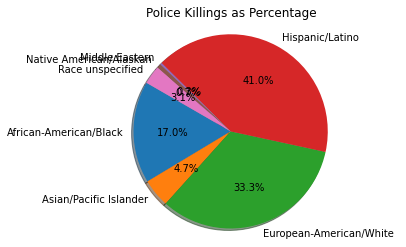

In [ ]:
race_AK=states_sum.loc['CA']['age'].index
import matplotlib.pyplot as plt
labels = race_AK
sizes = states_sum.loc['CA']["age"]
explode = (0.3, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Police Killings as Percentage')

Kills Percentage in California by race

In [ ]:
df_copy.drop(df.index[df_copy['year'] == 2100], inplace=True)

In [ ]:
killing_per_state = df_copy[['state','age']].groupby(['state']).count().reset_index()
killing_per_state.columns = ['state', 'Kills']
killing_per_state.head()

,state,Kills
0,AK,115
1,AL,609
2,AR,345
3,AZ,789
4,CA,4397


In [ ]:
import folium


In [ ]:
usa_population = pd.read_csv('/content/drive/MyDrive/Police_racial_equity/usa_population_2019.csv')
state_geo = '/content/drive/MyDrive/Police_racial_equity/us-states.json'

In [ ]:
map_usa = folium.Map(location=[37, -102], zoom_start=5)

folium.Choropleth(
    state_geo,
    name='choropleth',
    data=killing_per_state,
    columns=['state', 'Kills'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of police Kills by state',
    highlight=True
).add_to(map_usa)


In [ ]:
map_usa

Number of kills by state on US map. The darker the color, more the number of kills

In [ ]:
df_copy['race'].value_counts()

European-American/White    13682
African-American/Black      7773
Hispanic/Latino             4713
Race unspecified            1403
Asian/Pacific Islander       532
Native American/Alaskan      277
Middle Eastern                49
Name: race, dtype: int64

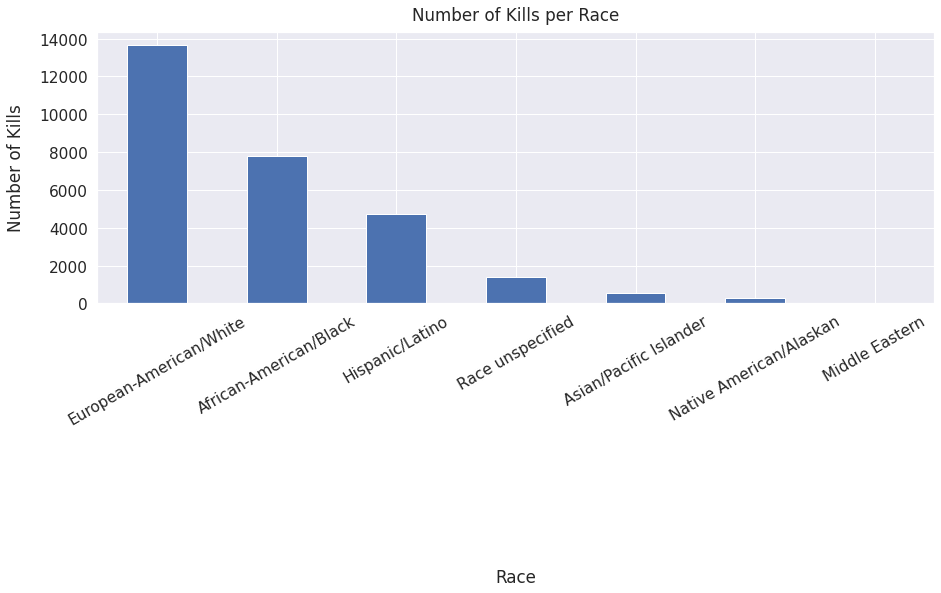

In [ ]:
sns.set(font_scale=1.4)
df_copy['race'].value_counts().plot(kind='bar', figsize=(15, 5), rot=30)
plt.xlabel("Race", labelpad=141)
plt.ylabel("Number of Kills", labelpad=14)
plt.title("Number of Kills per Race", y=1.02);

Number of Kills per Race on Bar Plot

In [ ]:
import plotly.graph_objects as go

data = df_copy.groupby(['race'])['age'].value_counts()
fig = go.Figure()
fig.add_trace(go.Box(x = [i[0] for i in data.index], y =[j[1] for j in data.index], marker_color = 'indianred', boxmean = True))
fig.update_layout(yaxis = dict(title = 'Deaths count'))
fig.show()

Box Plot for Races scattered by Ages

In [ ]:
df_copy['state'].value_counts()

CA    4579
TX    2525
FL    1736
GA    1075
IL    1046
OH     941
PA     923
MO     881
MI     838
AZ     830
OK     661
NY     646
AL     634
CO     625
WA     619
TN     617
NC     600
LA     597
VA     590
SC     546
IN     533
NJ     515
MD     510
WI     433
MS     409
KS     392
NM     386
KY     386
NV     378
AR     356
OR     318
MN     318
IA     263
UT     238
NE     197
MA     189
WV     172
ID     141
CT     136
AK     118
HI     107
ME      96
MT      96
DC      81
DE      59
WY      57
SD      56
NH      53
VT      39
ND      35
RI      26
Name: state, dtype: int64

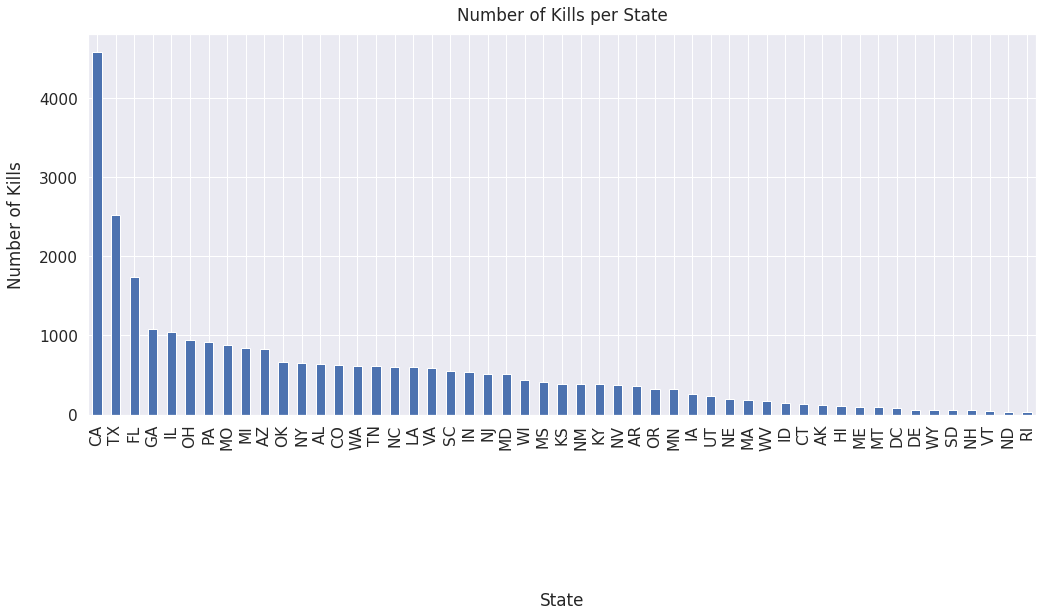

In [ ]:
sns.set(font_scale=1.4)
df_copy['state'].value_counts().plot(kind='bar', figsize=(17, 7), rot=90)
plt.xlabel("State", labelpad=141)
plt.ylabel("Number of Kills", labelpad=14)
plt.title("Number of Kills per State", y=1.02);

Number of Kills per State Bar Graph

In [ ]:
df_copy['gender'].value_counts()

Male           25775
Female          2709
Transgender       19
Name: gender, dtype: int64

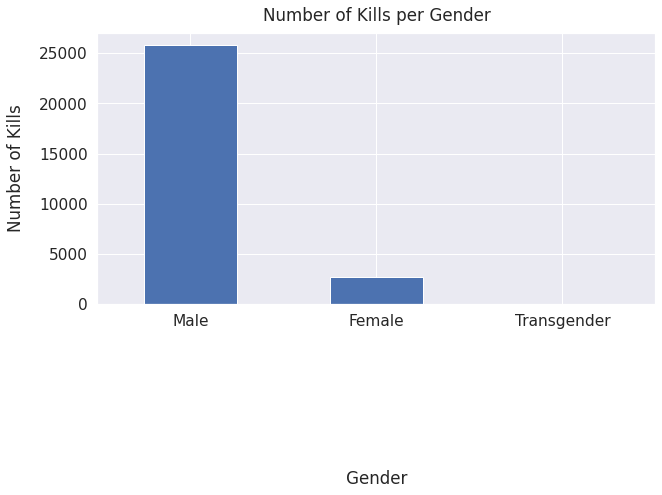

In [ ]:
sns.set(font_scale=1.4)
df_copy['gender'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel("Gender", labelpad=141)
plt.ylabel("Number of Kills", labelpad=14)
plt.title("Number of Kills per Gender", y=1.02);

Number of Kills per Gender Bar Graph

In [ ]:
df_copy['year'].value_counts()

2018    1852
2019    1812
2013    1782
2017    1767
2014    1717
2015    1606
2016    1597
2012    1486
2011    1407
2010    1291
2020    1290
2006    1266
2009    1257
2007    1253
2008    1210
2005    1169
2003    1052
2004    1036
2002     981
2001     923
2000     848
Name: year, dtype: int64

In [ ]:
df_copy['year'].value_counts()

2018    1852
2019    1812
2013    1782
2017    1767
2014    1717
2015    1606
2016    1597
2012    1486
2011    1407
2010    1291
2020    1290
2006    1266
2009    1257
2007    1253
2008    1210
2005    1169
2003    1052
2004    1036
2002     981
2001     923
2000     848
Name: year, dtype: int64

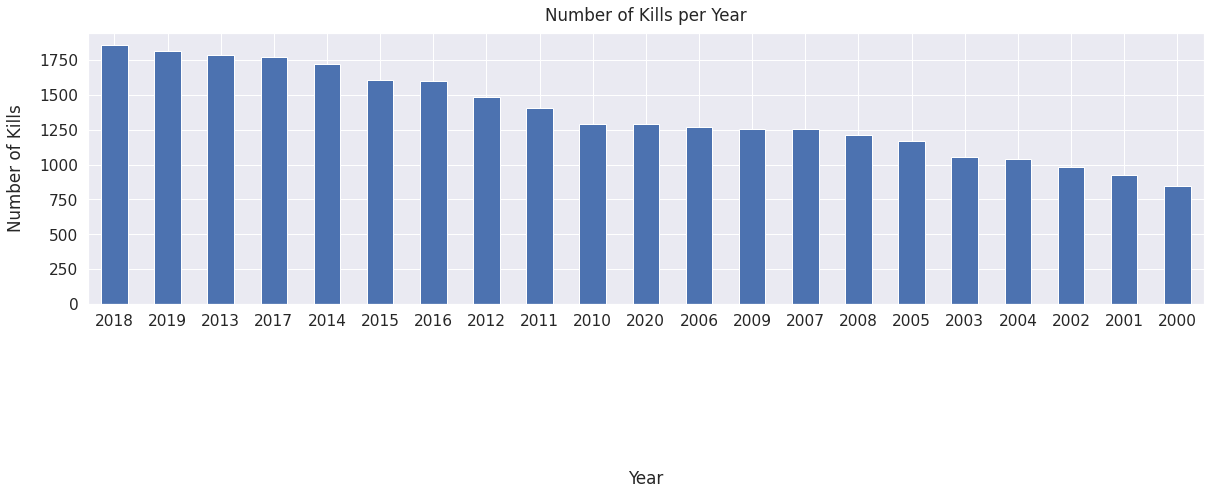

In [ ]:
sns.set(font_scale=1.4)
df_copy['year'].value_counts().plot(kind='bar', figsize=(20, 5), rot=0)
plt.xlabel("Year", labelpad=141)
plt.ylabel("Number of Kills", labelpad=14)
plt.title("Number of Kills per Year", y=1.02);

Number of Kills per Year Bar graph

[]

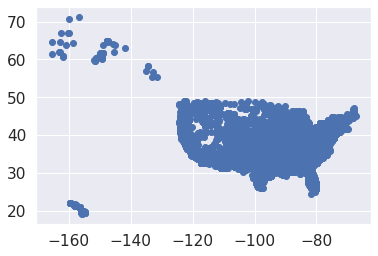

In [ ]:
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.rcParams["figure.figsize"] = (15,10)
plt.plot()

Kills on USA map as per Latitude and Longitude fields

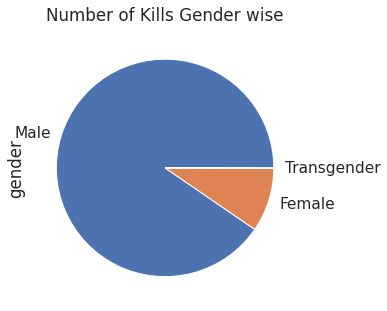

In [ ]:
sns.set(font_scale=1.4)
df_copy['gender'].value_counts().plot(kind='pie', figsize=(15, 5), rot=0)
plt.title("Number of Kills Gender wise", y=1.02);

Pie chart for kills per gender

In [ ]:
df_copy['cause'].value_counts()

Gunshot                              20287
Vehicle                               5862
Tasered                                917
Medical emergency                      381
Asphyxiated/Restrained                 277
Drug overdose                          178
Drowned                                176
Beaten/Bludgeoned with instrument      174
Undetermined                           102
Fell from a height                      75
Other                                   55
Stabbed                                 48
Burned/Smoke inhalation                 35
Chemical agent/Pepper spray             35
Name: cause, dtype: int64

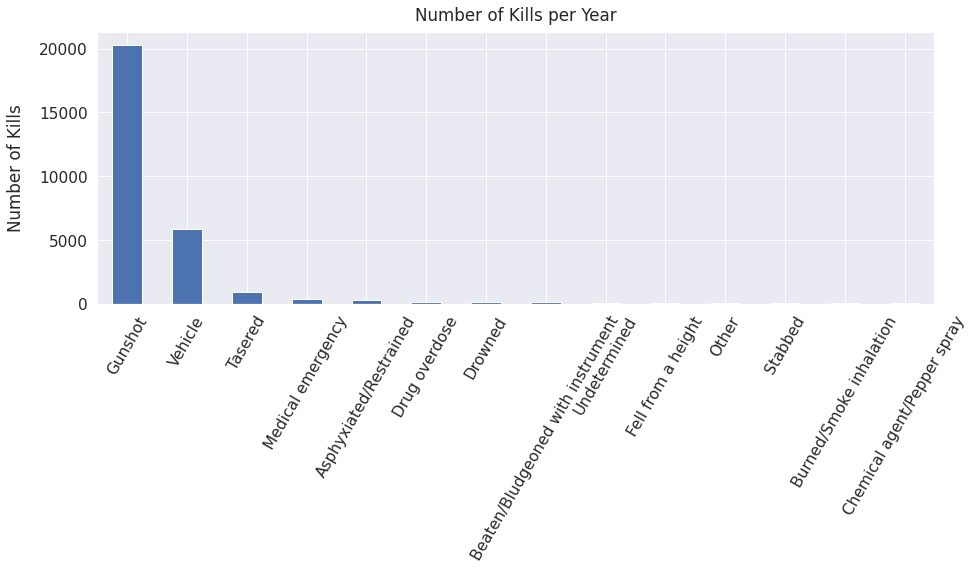

In [ ]:
sns.set(font_scale=1.4)
df_copy['cause'].value_counts().plot(kind='bar', figsize=(15, 5), rot=60)
plt.title("Number of Kills Gender wise", y=1.02);
plt.ylabel("Number of Kills", labelpad=14)
plt.title("Number of Kills per Cause of death", y=1.02);

Number of Kills per Cause of death Bar graph

In [ ]:
df_copy['force_used'].value_counts()

Intentional use of deadly force    17302
Vehicle/Pursuit                     5419
Suicide                             2969
Yes                                 1657
No                                   799
Pursuit                              332
Vehicle                               74
Undetermined                          47
Unknown                                1
Np                                     1
Intentional use of force               1
Name: force_used, dtype: int64

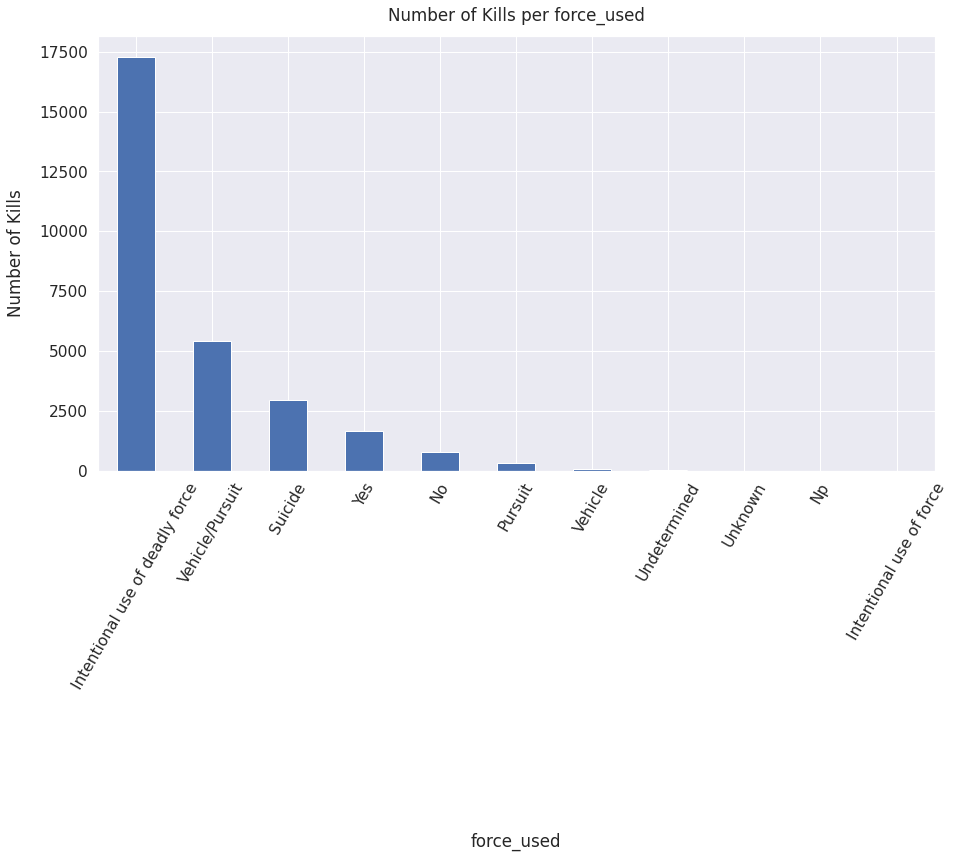

In [ ]:
sns.set(font_scale=1.4)
df_copy['force_used'].value_counts().plot(kind='bar', figsize=(15, 8), rot=60)
plt.xlabel("force_used", labelpad=141);
plt.ylabel("Number of Kills", labelpad=14)
plt.title("Number of Kills per force_used", y=1.02);

Number of Kills per force_used Bar graph

In [ ]:
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['month'] = pd.to_datetime(df_copy['date']).dt.month

In [ ]:
df_copy.head()

,age,gender,race,imp_prob,date,city,state,county,Latitude,Longitude,cause,force_used,mental_illness,year,mean_age,month
0,17.0,Male,European-American/White,Not imputed,2000-01-01,Willits,CA,Mendocino,39.470883,-123.361751,Vehicle,Pursuit,No,2000,17.0,1
1,21.0,Male,African-American/Black,Not imputed,2000-01-01,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,21.0,1
2,19.0,Male,African-American/Black,Not imputed,2000-01-01,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,19.0,1
3,23.0,Male,Hispanic/Latino,Not imputed,2000-01-01,Carlsbad,NM,Eddy,32.450080,-104.237643,Vehicle,Pursuit,No,2000,23.0,1
4,24.0,Female,African-American/Black,Not imputed,2000-01-02,Sacramento,CA,Sacramento,38.473949,-121.433776,Vehicle,Pursuit,No,2000,24.0,1


In [ ]:
df_copy_date = df_copy[['date','cause']].groupby('date').count().sort_values(by='date')
df_copy_date.rename(columns={'cause':'count'}, inplace=True)
df_copy_date.head()

,count
date,
2000-01-01,4
2000-01-02,4
2000-01-03,3
2000-01-05,6
2000-01-06,5


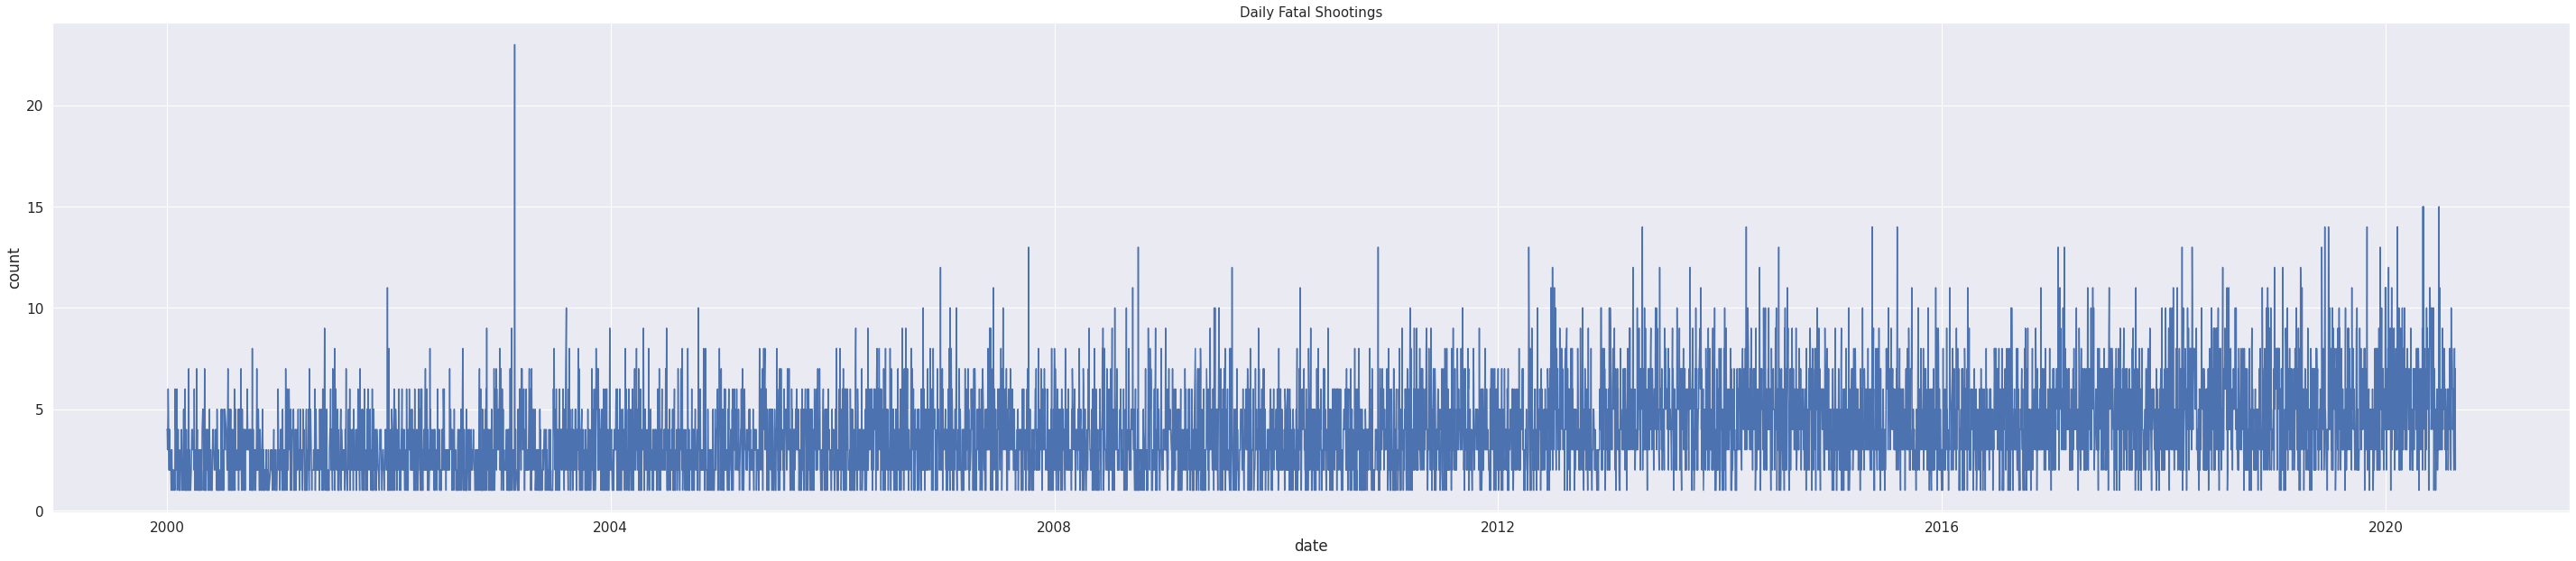

In [ ]:
plt.figure(figsize=(50,10))
plt.title('Daily Fatal Shootings', fontsize=15)
sns.lineplot(x=df_copy_date.index, y='count', data=df_copy_date)

Text(0.5, 1.0, 'Fatal Encounters - 10 day average')

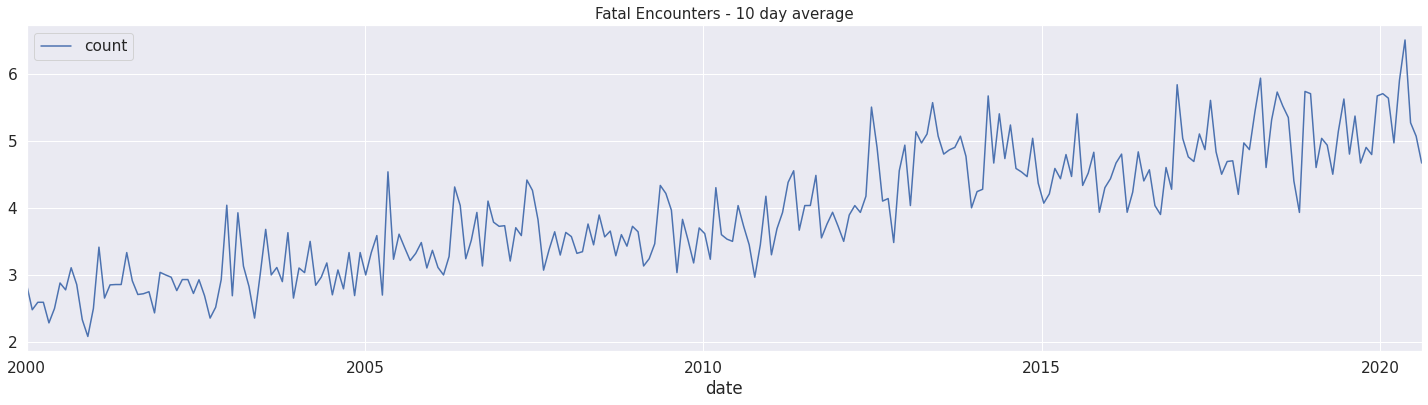

In [ ]:
df_copy_date.resample('30D').mean().plot(figsize=(25,6))
plt.title('Fatal Encounters - 10 day average', fontsize=15)

In [ ]:
!pip install sidetable
import sidetable
df_copy.stb.freq(['state'], thresh=50)

,state,count,percent,cumulative_count,cumulative_percent
0,CA,4579,16.009370,4579,16.009370
1,TX,2525,8.828054,7104,24.837424
2,FL,1736,6.069506,8840,30.906930
3,GA,1075,3.758478,9915,34.665408
4,IL,1046,3.657087,10961,38.322495
5,OH,941,3.289980,11902,41.612475
6,PA,923,3.227047,12825,44.839522
7,MO,881,3.080204,13706,47.919726
8,others,14896,52.080274,28602,100.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



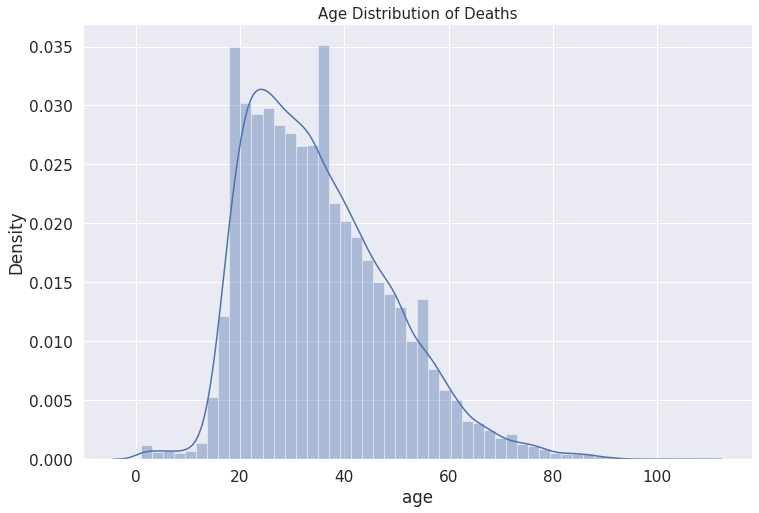

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Deaths', fontsize=15)
sns.distplot(df_copy.age)

This graph is the combination of histogram with the desnity estimation trend line 

In [ ]:
df_copy_race = df_copy[['race','year','cause']].groupby(['race','year']).count().reset_index()
df_copy_race.rename(columns={'cause':'number_of_deaths'}, inplace=True)
df_copy_race.head()

,race,year,number_of_deaths
0,African-American/Black,2000,243
1,African-American/Black,2001,227
2,African-American/Black,2002,246
3,African-American/Black,2003,305
4,African-American/Black,2004,263


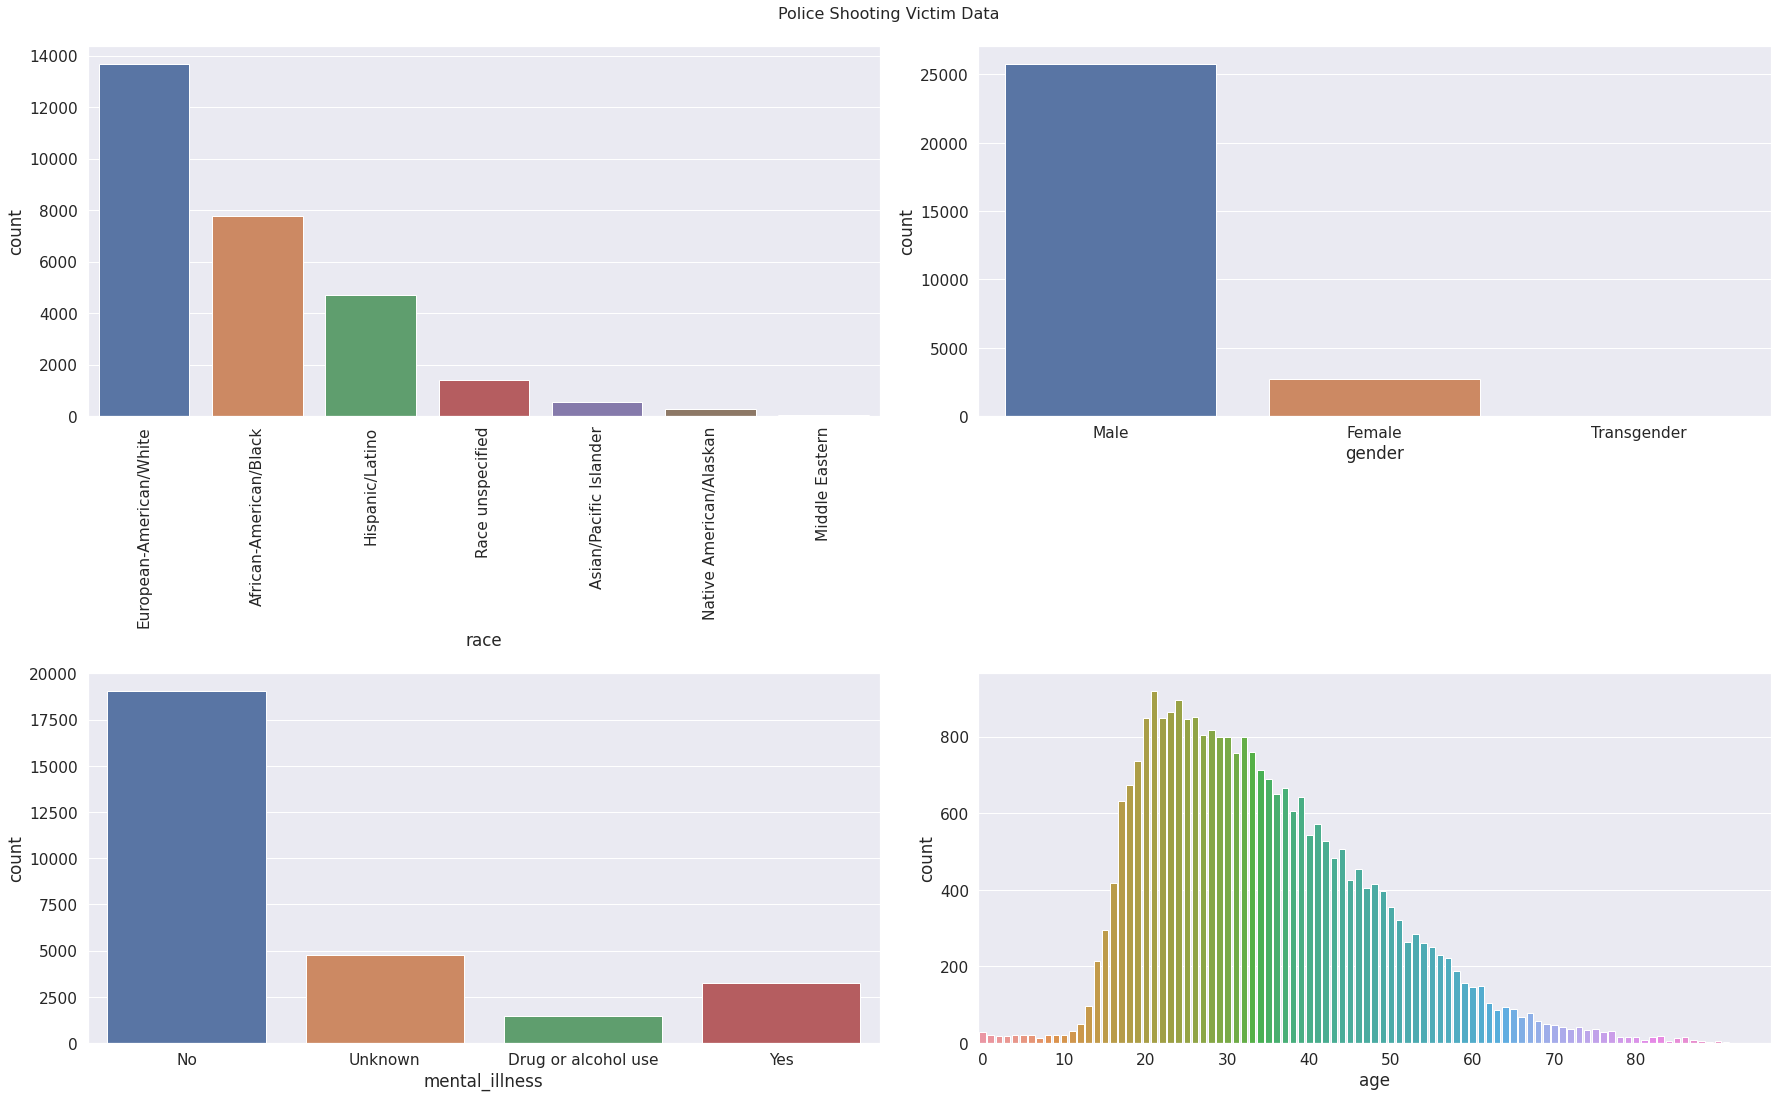

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 15))

sns.countplot(x='race', orient='v', ax=ax1, data=df_copy)
sns.countplot(x='gender', orient='v', ax=ax2, data=df_copy)
sns.countplot(x='mental_illness', orient='v', ax=ax3, data=df_copy)
sns.countplot(x='age', orient='v', ax=ax4, data=df_copy)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax4.set_xticks(range(0, 90, 10))
ax4.set_xticklabels(range(0, 90, 10))
fig.suptitle('Police Shooting Victim Data', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### Ten states with Highest Kills

In [ ]:
top10States= df_copy.state.value_counts().head(10)

In [ ]:
top10States

CA    4579
TX    2525
FL    1736
GA    1075
IL    1046
OH     941
PA     923
MO     881
MI     838
AZ     830
Name: state, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of deaths')

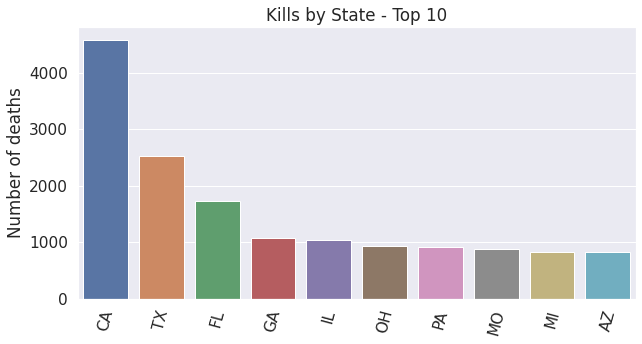

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Kills by State - Top 10")
plt.xticks(rotation=75)
sns.barplot(top10States.index, top10States)
plt.ylabel('Number of deaths')

#### Ten states with Lowest Kills


In [ ]:
bottom10States= df_copy.state.value_counts().tail(10)

In [ ]:
bottom10States

ME    96
MT    96
DC    81
DE    59
WY    57
SD    56
NH    53
VT    39
ND    35
RI    26
Name: state, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of deaths')

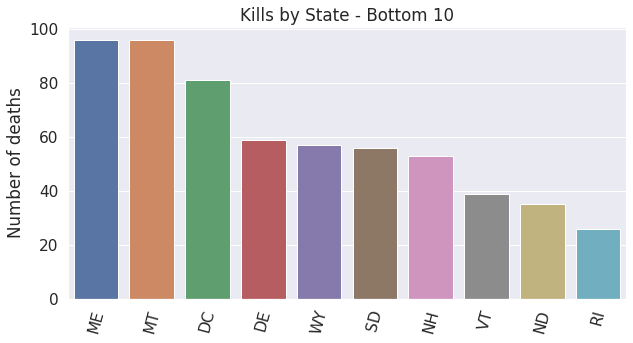

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Kills by State - Bottom 10")
plt.xticks(rotation=75)
sns.barplot(bottom10States.index, bottom10States)
plt.ylabel('Number of deaths')

#### 20 Counties with Highest Kills

In [ ]:
top20Counties = df_copy.county.value_counts().head(20)


In [ ]:
top20Counties

Los Angeles       1218
Cook               606
Harris             558
Maricopa           475
Orange             440
Jefferson          387
San Diego          341
San Bernardino     340
Clark              327
Jackson            298
Wayne              290
Dallas             287
Riverside          282
Montgomery         250
Bexar              243
Miami-Dade         233
Philadelphia       233
Franklin           230
Alameda            228
Marion             199
Name: county, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of deaths')

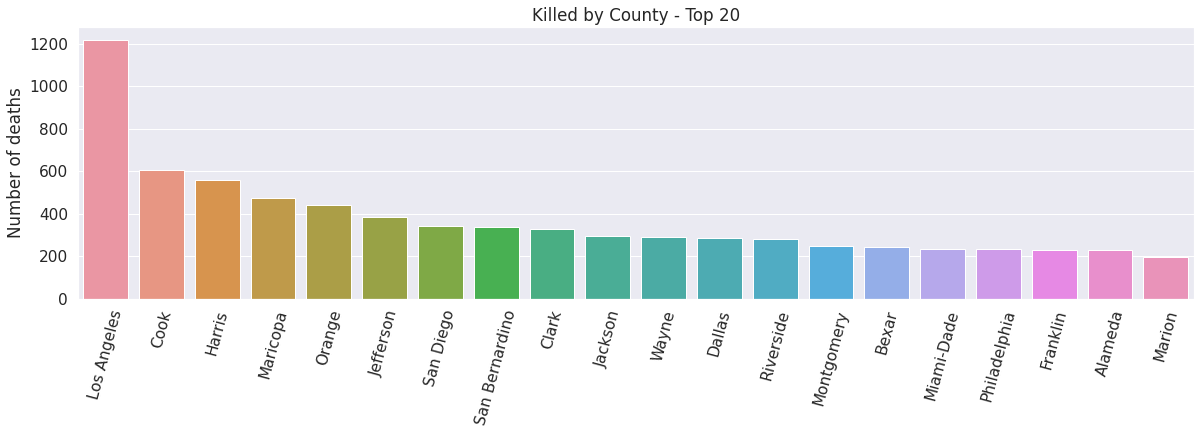

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Killed by County - Top 20")
plt.xticks(rotation=75)
sns.barplot(top20Counties.index, top20Counties)
plt.ylabel('Number of deaths')

#### 20 Counties with Lowest Kills

In [ ]:
bottom20Counties = df_copy.county.value_counts().tail(20)


In [ ]:
bottom20Counties

Hoke            1
Tillamook       1
Bertie          1
Guthrie         1
Casey           1
Cross           1
Prairie         1
Reagan          1
Labette         1
Tucker          1
Juab            1
Prentiss        1
Colorado        1
Archuleta       1
Gallia          1
Lumpkin         1
Foard           1
Breckinridge    1
Idaho           1
Dearborn        1
Name: county, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of deaths')

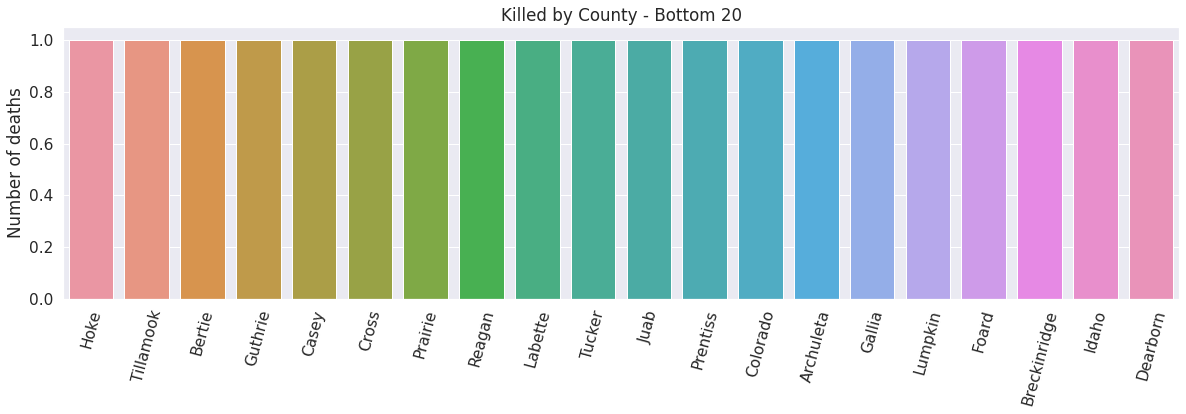

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Killed by County - Bottom 20")
plt.xticks(rotation=75)
sns.barplot(bottom20Counties.index, bottom20Counties)
plt.ylabel('Number of deaths')

#### 20 Cities with Highest Kills

In [ ]:
top20Cities = df_copy.city.value_counts().head(20)


In [ ]:
top20Cities

Chicago          451
Houston          446
Los Angeles      407
Phoenix          252
Philadelphia     231
San Antonio      230
Kansas City      228
St. Louis        209
Las Vegas        200
Dallas           190
Detroit          175
Columbus         166
Oklahoma City    156
Albuquerque      153
Baltimore        151
Jacksonville     151
Atlanta          146
Miami            141
Tucson           136
Fresno           135
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of deaths')

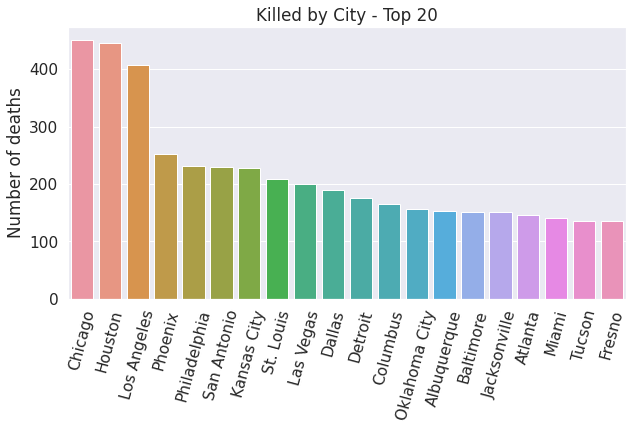

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Killed by City - Top 20")
plt.xticks(rotation=75)
sns.barplot(top20Cities.index, top20Cities)
plt.ylabel('Number of deaths')

#### 20 Cities with Lowest Kills

In [ ]:
bottom20Cities = df_copy.city.value_counts().tail(20)


In [ ]:
bottom20Cities

Salton City        1
West Linn          1
Prickett's Fort    1
McNeil             1
Argonne            1
Chiloquin          1
Granton            1
Naugatuck          1
St. John           1
Bluewell           1
Shiner             1
Heidelberg         1
Malone             1
Woburn             1
Griffith           1
Bowbells           1
Chartiers          1
Philipsburg        1
Harwood Heights    1
Wilkesboro         1
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of deaths')

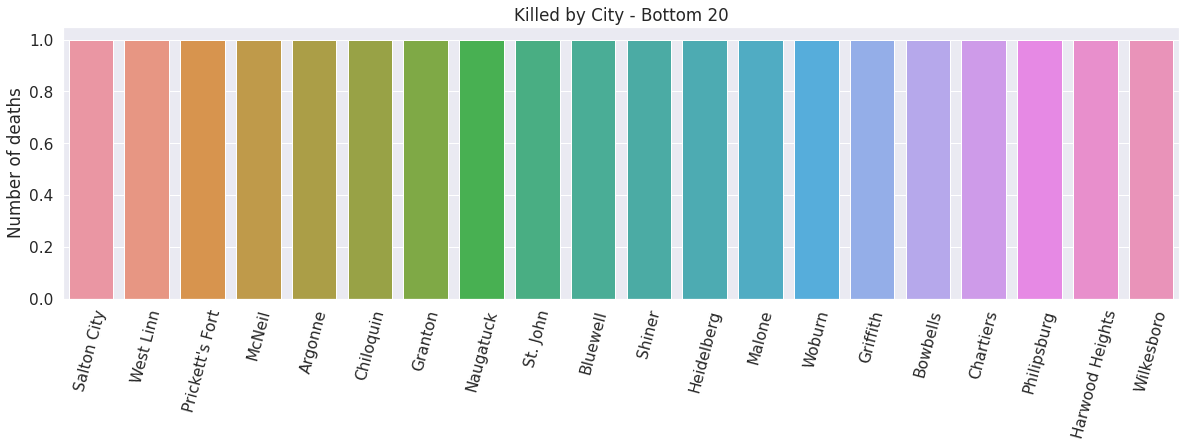

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Killed by City - Bottom 20")
plt.xticks(rotation=75)
sns.barplot(bottom20Cities.index, bottom20Cities)
plt.ylabel('Number of deaths')

# Time series analysis 

In [ ]:
df_copy

In [ ]:
import datetime

In [ ]:
df_copy['date'] = pd.to_datetime(df_copy['date'])

In [ ]:
df_copy['month'] = df_copy['date'].dt.month

In [ ]:
df_copy

In [ ]:
df_copy['month_year'] = pd.to_datetime(df['date'])